<a href="https://colab.research.google.com/github/oktaviacitraaa/data-prep/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# **Initial Data**

In [0]:
# Download Data
URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQwPxotnLsgXuZt6tIXlAANttT3pxhP4ph0FhSjwvGUXfGKcnFRiqJORQg_9lBC77AH7QaxYypQ24nX/pub?output=csv"
datafile = tf.keras.utils.get_file("data.csv", URL)

In [217]:
# Read data
dataframe = pd.read_csv(datafile, index_col=None)
dataframe

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.380,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.990,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.570,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.910,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.540,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,111.000,1.159,2.439,1.389,1.726,5.623,1.176,1.256,7.673,158.70,103.000,2.891,5.198,2.454,1.114,4.239,25.450,26.40,166.10,2027.0,141.000,2.113,4.107,2.216,206.000,7.115
565,926682,M,20.13,28.25,131.20,1261.0,978.000,1.034,144.000,9.791,1.752,5.533,7.655,2.463,5.203,99.04,5.769,2.423,395.000,1.678,1.898,2.498,23.690,38.25,155.00,1731.0,1.166,1.922,3.215,1.628,2.572,6.637
566,926954,M,16.60,28.08,108.30,858.1,8.455,1.023,9.251,5.302,159.000,5.648,4.564,1.075,3.425,48.55,5.903,3.731,473.000,1.557,1.318,3.892,18.980,34.12,126.70,1124.0,1.139,3.094,3.403,1.418,2.218,782.000
567,927241,M,20.60,29.33,140.10,1265.0,1.178,277.000,3.514,152.000,2.397,7.016,726.000,1.595,5.772,86.22,6.522,6.158,7.117,1.664,2.324,6.185,25.740,39.42,184.60,1821.0,165.000,8.681,9.387,265.000,4.087,124.000


# **Inspect Data**

In [218]:
# Show first 5 rows
dataframe.head() 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,1.184,2.776,3.001,1.471,2.419,7.871,1.095,9.053,8.589,153.40,6.399,4.904,5.373,1.587,3.003,6.193,25.38,17.33,184.60,2019.0,1.622,6.656,7.119,2.654,4.601,1.189
1,842517,M,20.57,17.77,132.90,1326.0,8.474,7.864,869.000,7.017,1.812,5.667,5.435,7.339,3.398,74.08,5.225,1.308,186.000,134.000,1.389,3.532,24.99,23.41,158.80,1956.0,1.238,1.866,2.416,186.000,275.000,8.902
2,84300903,M,19.69,21.25,130.00,1203.0,1.096,1.599,1.974,1.279,2.069,5.999,7.456,7.869,4.585,94.03,615.000,4.006,3.832,2.058,225.000,4.571,23.57,25.53,152.50,1709.0,1.444,4.245,4.504,243.000,3.613,8.758
3,84348301,M,11.42,20.38,77.58,386.1,1.425,2.839,2.414,1.052,2.597,9.744,4.956,1.156,3.445,27.23,911.000,7.458,5.661,1.867,5.963,9.208,14.91,26.50,98.87,567.7,2.098,8.663,6.869,2.575,6.638,173.000
4,84358402,M,20.29,14.34,135.10,1297.0,1.003,1.328,198.000,1.043,1.809,5.883,7.572,7.813,5.438,94.44,1.149,2.461,5.688,1.885,1.756,5.115,22.54,16.67,152.20,1575.0,1.374,205.000,0.400,1.625,2.364,7.678


In [219]:
# Show last 5 rows
dataframe.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,111.000,1.159,2.439,1.389,1.726,5.623,1.176,1.256,7.673,158.70,103.000,2.891,5.198,2.454,1.114,4.239,25.450,26.40,166.10,2027.0,141.000,2.113,4.107,2.216,206.000,7.115
565,926682,M,20.13,28.25,131.20,1261.0,978.000,1.034,144.000,9.791,1.752,5.533,7.655,2.463,5.203,99.04,5.769,2.423,395.000,1.678,1.898,2.498,23.690,38.25,155.00,1731.0,1.166,1.922,3.215,1.628,2.572,6.637
566,926954,M,16.60,28.08,108.30,858.1,8.455,1.023,9.251,5.302,159.000,5.648,4.564,1.075,3.425,48.55,5.903,3.731,473.000,1.557,1.318,3.892,18.980,34.12,126.70,1124.0,1.139,3.094,3.403,1.418,2.218,782.000
567,927241,M,20.60,29.33,140.10,1265.0,1.178,277.000,3.514,152.000,2.397,7.016,726.000,1.595,5.772,86.22,6.522,6.158,7.117,1.664,2.324,6.185,25.740,39.42,184.60,1821.0,165.000,8.681,9.387,265.000,4.087,124.000
568,92751,B,7.76,24.54,47.92,181.0,5.263,4.362,0.000,0.000,1.587,5.884,3.857,1.428,2.548,19.15,7.189,466.000,0.000,0.000,2.676,2.783,9.456,30.37,59.16,268.6,8.996,6.444,0.000,0.000,2.871,7.039


In [220]:
# Show list of all column names
dataframe.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [221]:
# Get number of rows and columns
dataframe.shape

(569, 32)

In [222]:
# Get additional info about dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [223]:
# Show statistical description, only for numeric values
dataframe.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.00000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,53.418260,28.886329,40.97464,36.058367,18.432831,64.298601,31.829295,25.709153,7.543476,40.337079,52.618624,26.698849,30.156014,41.761756,20.248257,31.288517,16.269190,25.677223,107.261213,880.583128,14.057726,33.590564,39.535367,43.891974,32.661968,56.040787
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,192.691499,117.510703,142.13157,123.109612,53.388748,182.029228,102.107587,129.066901,62.903469,45.491006,168.093660,99.874174,115.003234,150.108246,58.972785,106.068483,4.833242,6.146258,33.602542,569.356993,55.312800,114.565888,132.220929,154.494270,89.988802,190.731370
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.100000,0.060000,0.00000,0.000000,0.180000,0.060000,0.210000,0.780000,1.011000,6.802000,0.010000,1.003000,0.000000,0.000000,1.013000,1.002000,7.930000,12.020000,50.410000,185.200000,0.130000,0.100000,0.000000,0.000000,0.210000,0.120000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,1.137000,1.436000,1.68400,1.967000,1.632000,5.853000,2.213000,1.309000,1.667000,17.850000,4.493000,1.695000,1.861000,1.346000,1.537000,2.256000,13.010000,21.080000,84.110000,515.300000,1.223000,1.843000,1.916000,1.595000,2.527000,6.609000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,8.293000,4.458000,3.13600,3.515000,1.813000,6.232000,3.237000,1.885000,2.346000,24.530000,5.888000,2.808000,3.109000,2.308000,1.948000,3.324000,14.970000,25.410000,97.660000,686.500000,1.377000,2.884000,3.469000,2.701000,2.871000,7.628000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,9.383000,7.542000,6.18100,7.583000,2.035000,6.899000,5.204000,7.198000,3.479000,45.190000,7.702000,5.156000,5.263000,7.807000,2.701000,4.841000,18.790000,29.720000,125.400000,1084.000000,1.562000,5.213000,6.121000,7.763000,3.313000,8.553000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,997.000000,958.000000,973.00000,974.000000,304.000000,898.000000,726.000000,976.000000,968.000000,542.200000,968.000000,911.000000,996.000000,956.000000,388.000000,866.000000,36.040000,49.540000,251.200000,4254.000000,997.000000,937.000000,942.000000,991.000000,544.000000,997.000000


In [224]:
# Get column names
column_names = dataframe.columns
print(column_names)

# Get column data types
dataframe.dtypes

# Also check if the column is unique
for i in column_names:
  print('{} is unique: {}'.format(i, dataframe[i].is_unique))

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
id is unique: True
diagnosis is unique: False
radius_mean is unique: False
texture_mean is unique: False
perimeter_mean is unique: False
area_mean is unique: False
smoothness_mean is unique: False
compactness_mean is unique: False
concavity_mean is unique: False
concave points_mean is unique: False
symmetry_mean is unique: False
fractal_dimension_m

# **Handling missing data**

In [225]:
# Check the index values
dataframe.index.values

# Check if a certain index exists
'foo' in dataframe.index.values

# If index does not exist
# dataframe.set_index('column_name_to_use', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


False

In [226]:
# Create new variable to hold the old value
old_length = dataframe.shape

# Delete row/columns that be duplicated
dataframe.drop_duplicates()

# Create new variable to hold the new value
new_length = dataframe.shape

print('there is ' + ('duplication' if old_length == new_length else 'nothing'))

there is duplication


In [227]:
# Check all cell if there are any that have null value
nan_count = 0
for i in dataframe.columns:
  if dataframe[i].isnull().values.any():
    dataframe[i] = dataframe[i].fillna(dataframe[i].mean())
    print("There is NaN at " + i)
    nan_count += 1

print("Theres is " + ("no" if nan_count == 0 else str(nan_count)) + " NaN")

Theres is no NaN


In [0]:
assert dataframe.notnull().all().all() # Should return nothing

for i in dataframe.drop(['id', 'diagnosis'], axis=1):
  assert(dataframe[i] >= 0.0 ).all() # Should return nothing

assert(dataframe['diagnosis'] != str).any() # Should return nothing
assert(dataframe['id'] >= 0).any() # Should return nothing

# **Visualize Data**

In [0]:
# Create variable to hold value for show plot
x = dataframe.drop(['id', 'diagnosis'], axis=1)
y = dataframe['diagnosis']

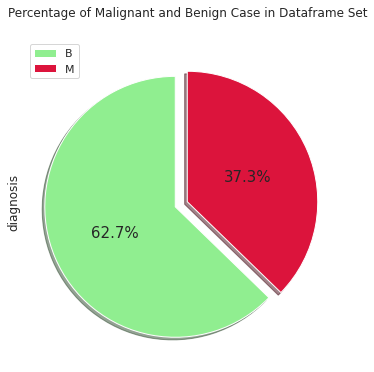

In [230]:
# Create pie chart
colors_list = ['lightgreen', 'crimson']
explode_list = [0.1, 0] # ratio for each class with which to offset each wedge.

dataframe['diagnosis'].value_counts().plot(kind='pie',
                                       figsize=(6, 6),
                                       autopct='%1.1f%%', 
                                       startangle=90,    
                                       shadow=True,       
                                       labels=None,         # turn off labels on pie chart
                                       pctdistance=0.5,     # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                       fontsize=15,
                                       colors=colors_list,  # add custom colors
                                       explode=explode_list 
                                       )

# scale the title up by 5% to match pctdistance
plt.title('Percentage of Malignant and Benign Case in Dataframe Set', y = 1.05) 

# add legend
plt.legend(labels=y.value_counts().index, loc='upper left') 
plt.show()

In [231]:
# Create pivot table
pd.pivot_table(dataframe, index=["id", "diagnosis"])

,,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,concavity_se,concavity_worst,fractal_dimension_mean,fractal_dimension_se,fractal_dimension_worst,perimeter_mean,perimeter_se,perimeter_worst,radius_mean,radius_se,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
id,diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8670,M,748.9,48.31,1156.0,1.223,1.484,2.394,8.087,1.093,1.514,1.466,2.813,3.791,5.796,2.461,8.019,101.70,3.094,124.90,15.46,4.743,19.26,1.092,624.000,1.546,1.931,1.397,2.837,19.48,7.859,26.00
8913,B,515.9,12.68,577.0,3.729,1.345,1.147,1.171,5.905,5.366,226.000,1.652,1.186,5.581,2.081,6.915,81.89,1.115,87.40,12.89,1.532,13.62,6.955,4.731,9.616,1.337,1.619,2.309,13.12,469.000,15.54
8915,B,687.3,24.87,809.8,9.823,2.115,303.000,4.819,1.187,1.489,594.000,1.536,1.804,5.852,2.815,8.472,97.03,2.171,109.10,14.96,2.877,16.25,8.992,5.332,1.313,1.879,1.522,2.962,19.10,948.000,26.19
9047,B,507.6,11.36,580.9,8.836,1.285,1.958,239.000,7.308,8.388,3.296,1.613,181.000,62.000,1.972,7.834,83.18,9.975,89.69,12.94,1.458,13.86,9.879,2.887,1.172,1.735,187.000,3.297,16.17,905.000,23.02
85715,M,534.6,24.25,759.4,1.231,2.336,4.166,734.000,1.215,2.088,1.226,2.905,5.006,6.777,3.643,1.179,85.98,1.897,102.80,13.17,2.871,15.67,1.158,6.532,1.786,2.128,1.743,0.390,18.66,8.937,27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911157302,M,1384.0,81.89,2022.0,1.175,2.075,3.101,1.155,1.466,228.000,1.572,3.185,4.399,5.661,2.205,7.425,138.10,4.542,168.20,21.10,6.643,25.68,9.684,5.467,1.368,1.554,1.029,2.268,20.52,1.361,32.07
911296201,M,930.9,115.20,1648.0,111.000,2.219,2.444,6.431,1.458,1.555,1.007,2.721,2.639,6.281,4.417,906.000,111.20,6.051,152.10,17.08,9.291,22.96,9.898,874.000,0.160,1.793,2.045,301.000,27.15,1.152,34.49
911296202,M,2501.0,542.20,4254.0,1.988,5.374,4.256,1.689,2.598,2.625,3.635,8.055,6.833,5.623,4.558,7.427,186.90,18.650,251.20,27.42,2.547,36.04,1.084,765.000,1.357,2.061,1.697,2.641,26.27,1.306,31.37


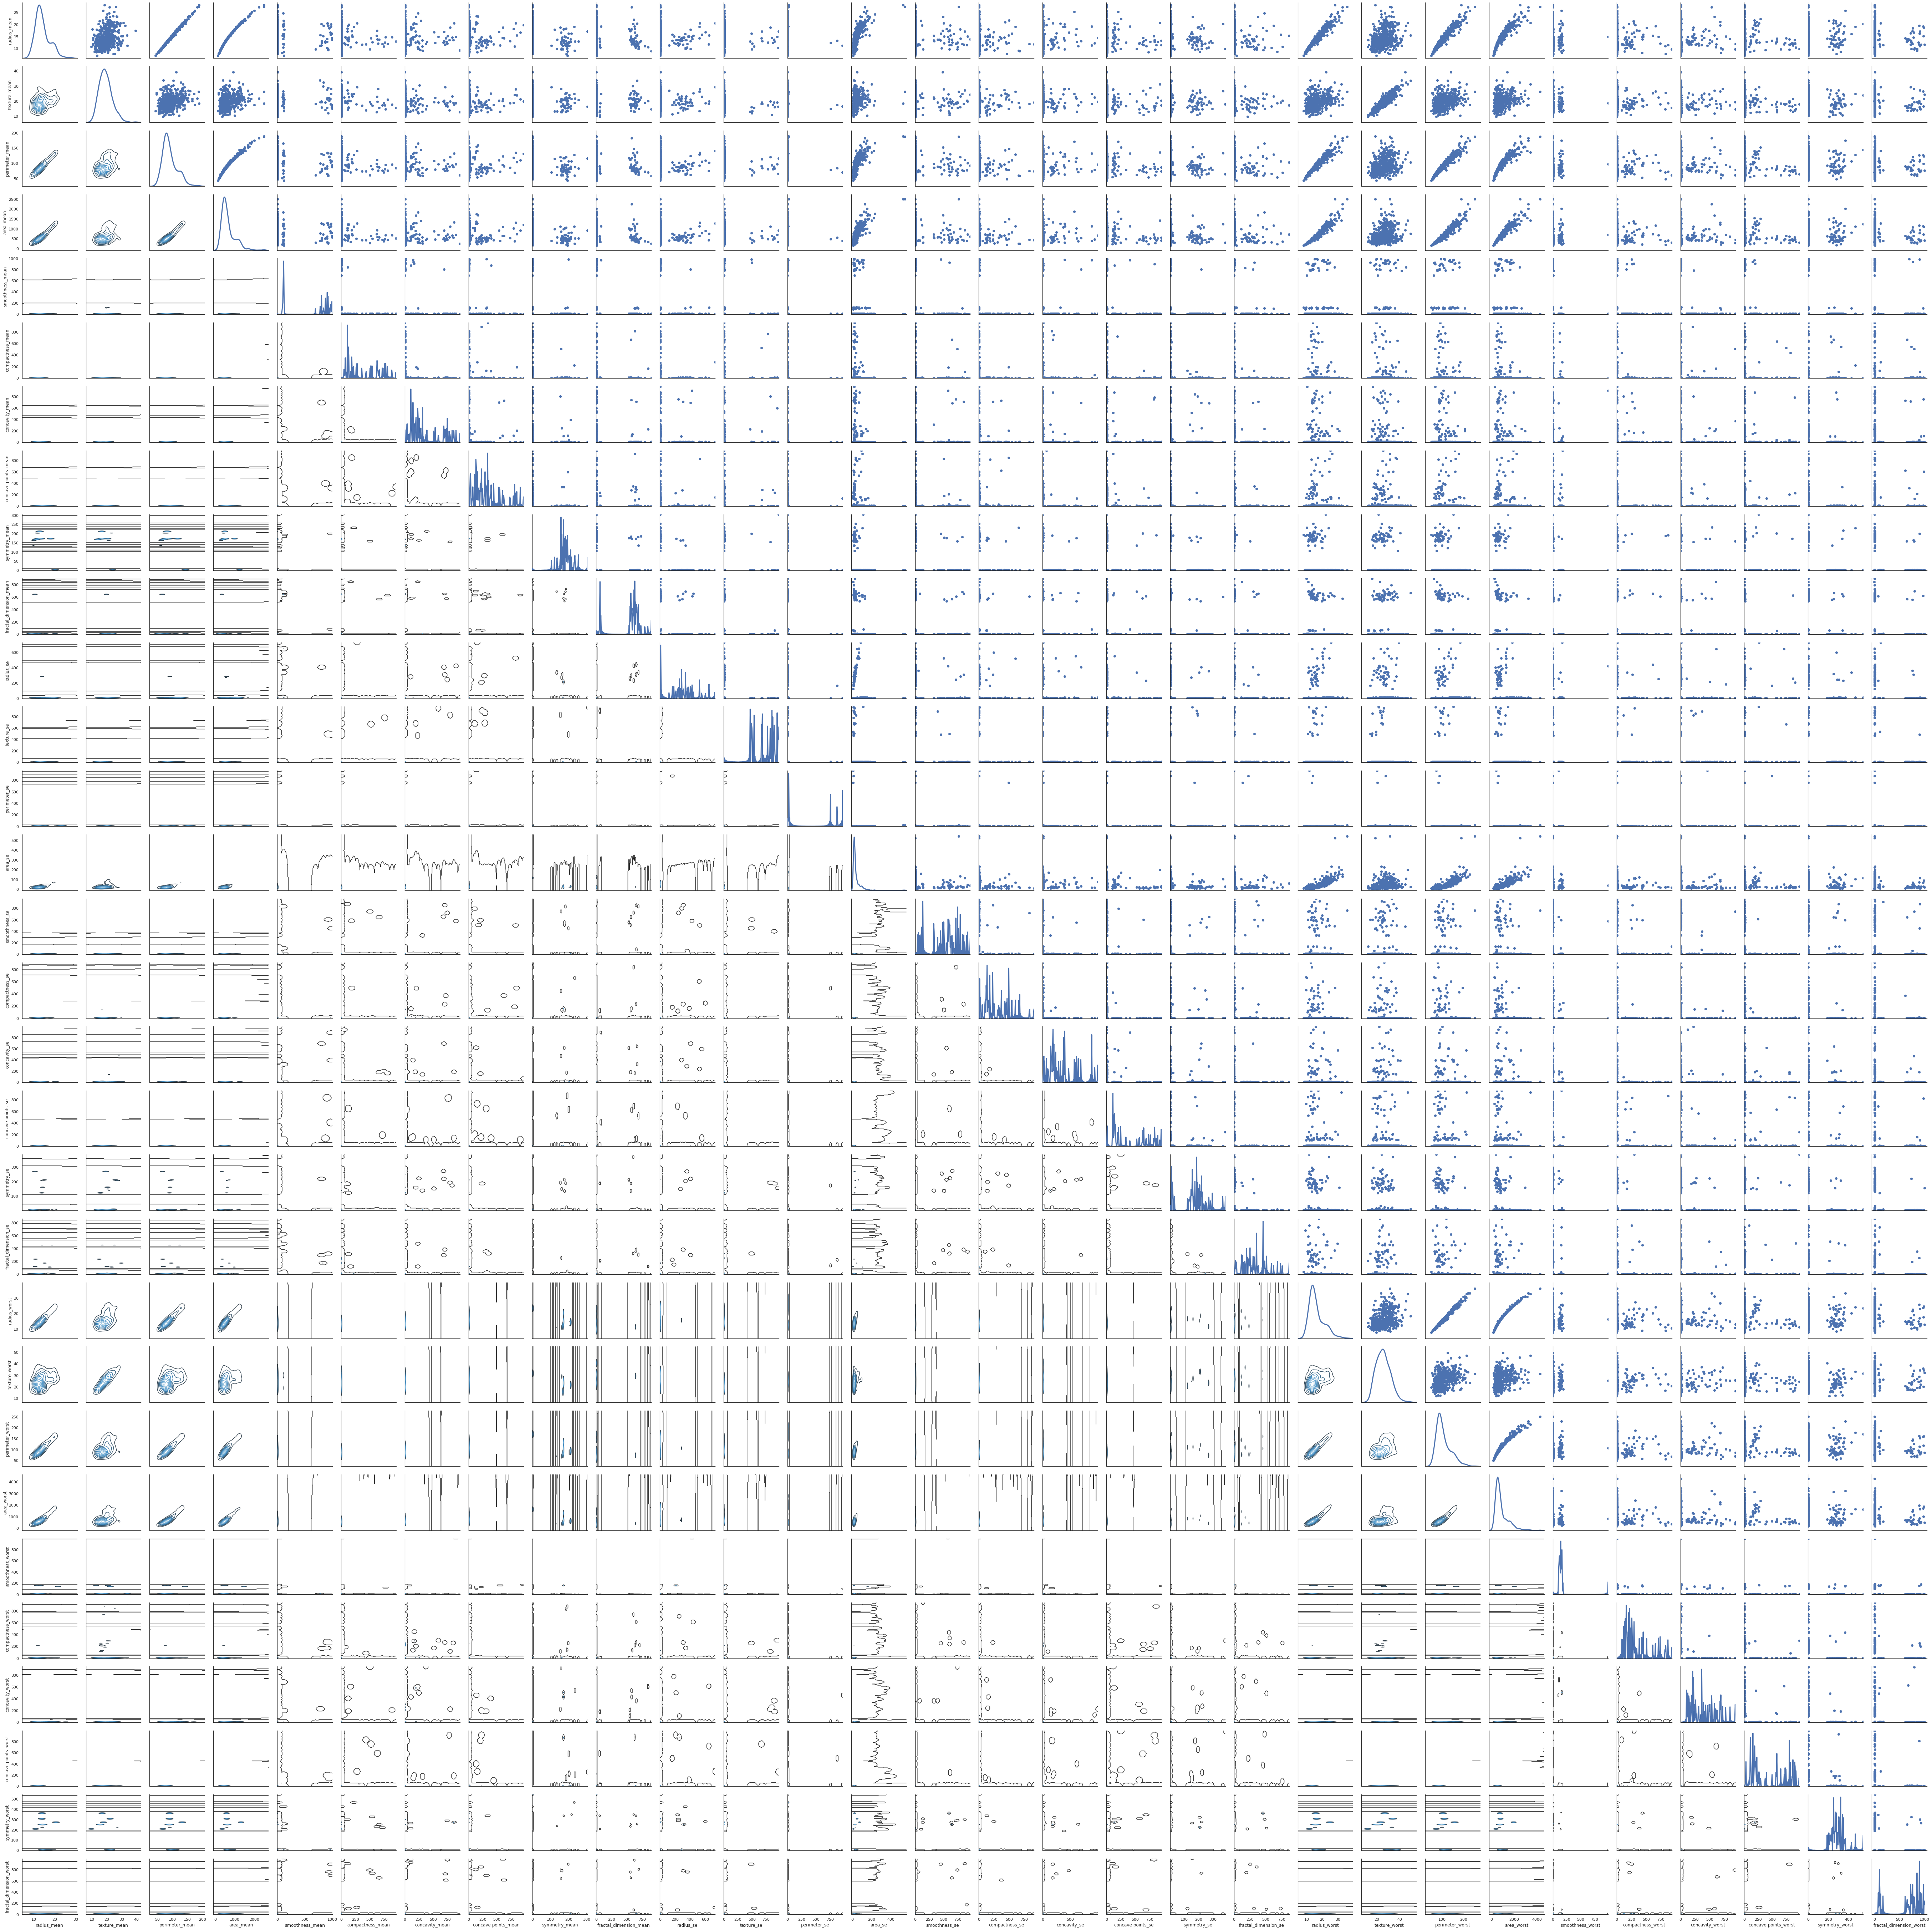

In [232]:
sns.set(style="white")
df = x.loc[:,x.columns]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

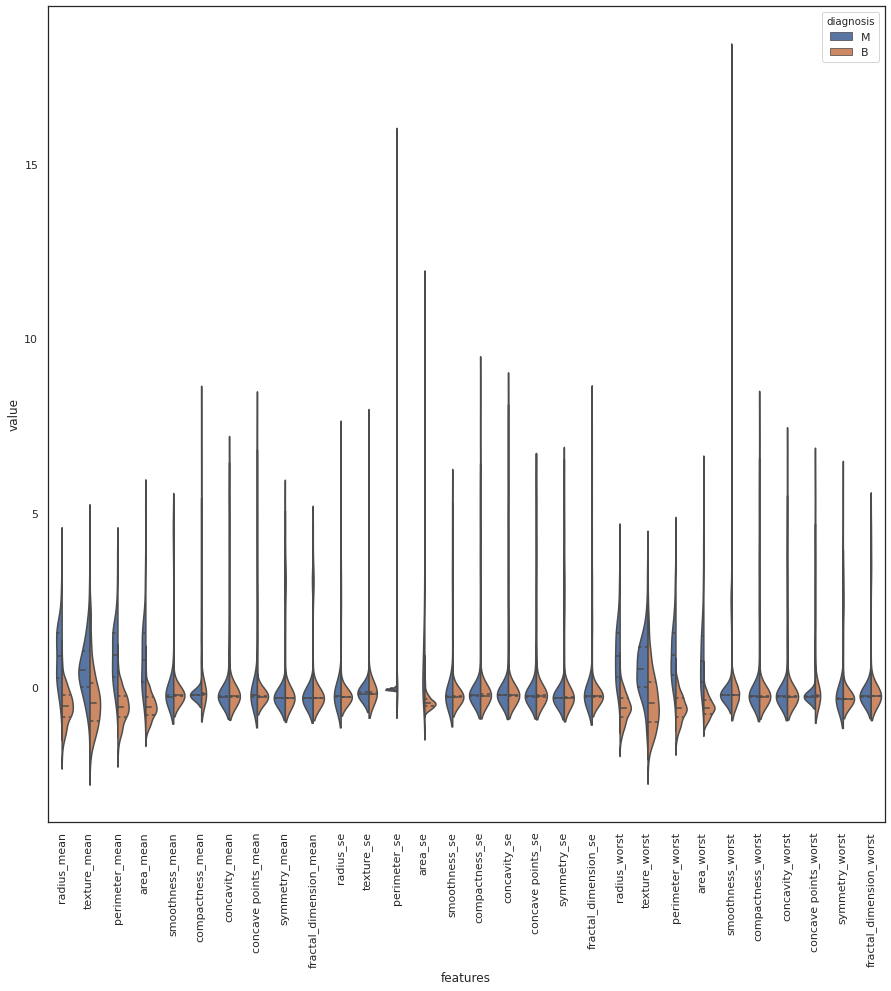

In [233]:
# All features concat
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_dia,data_n_2.iloc[:,0:568]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,15))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

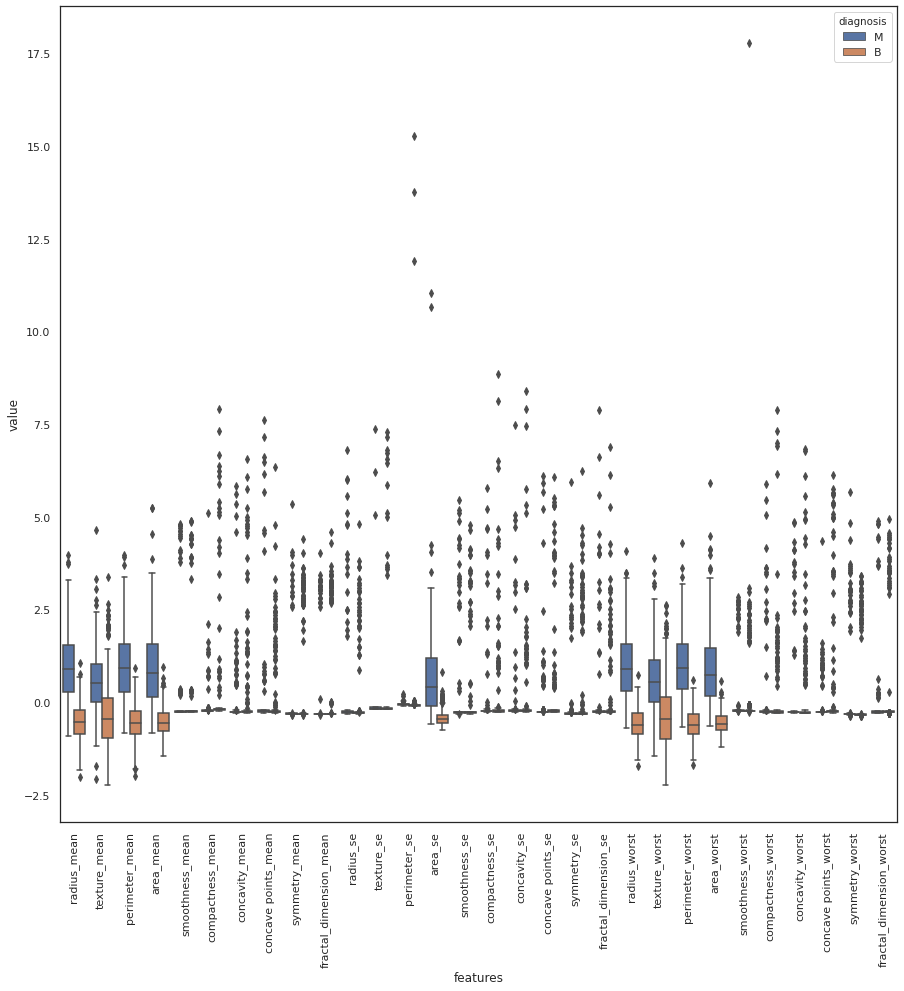

In [234]:
# As an alternative of violin plot, box plot can be used
# box plots are also useful in terms of seeing outliers
# I do not visualize all features with box plot
# In order to show you lets have an example of box plot
# If you want, you can visualize other features as well.
plt.figure(figsize=(15,15))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

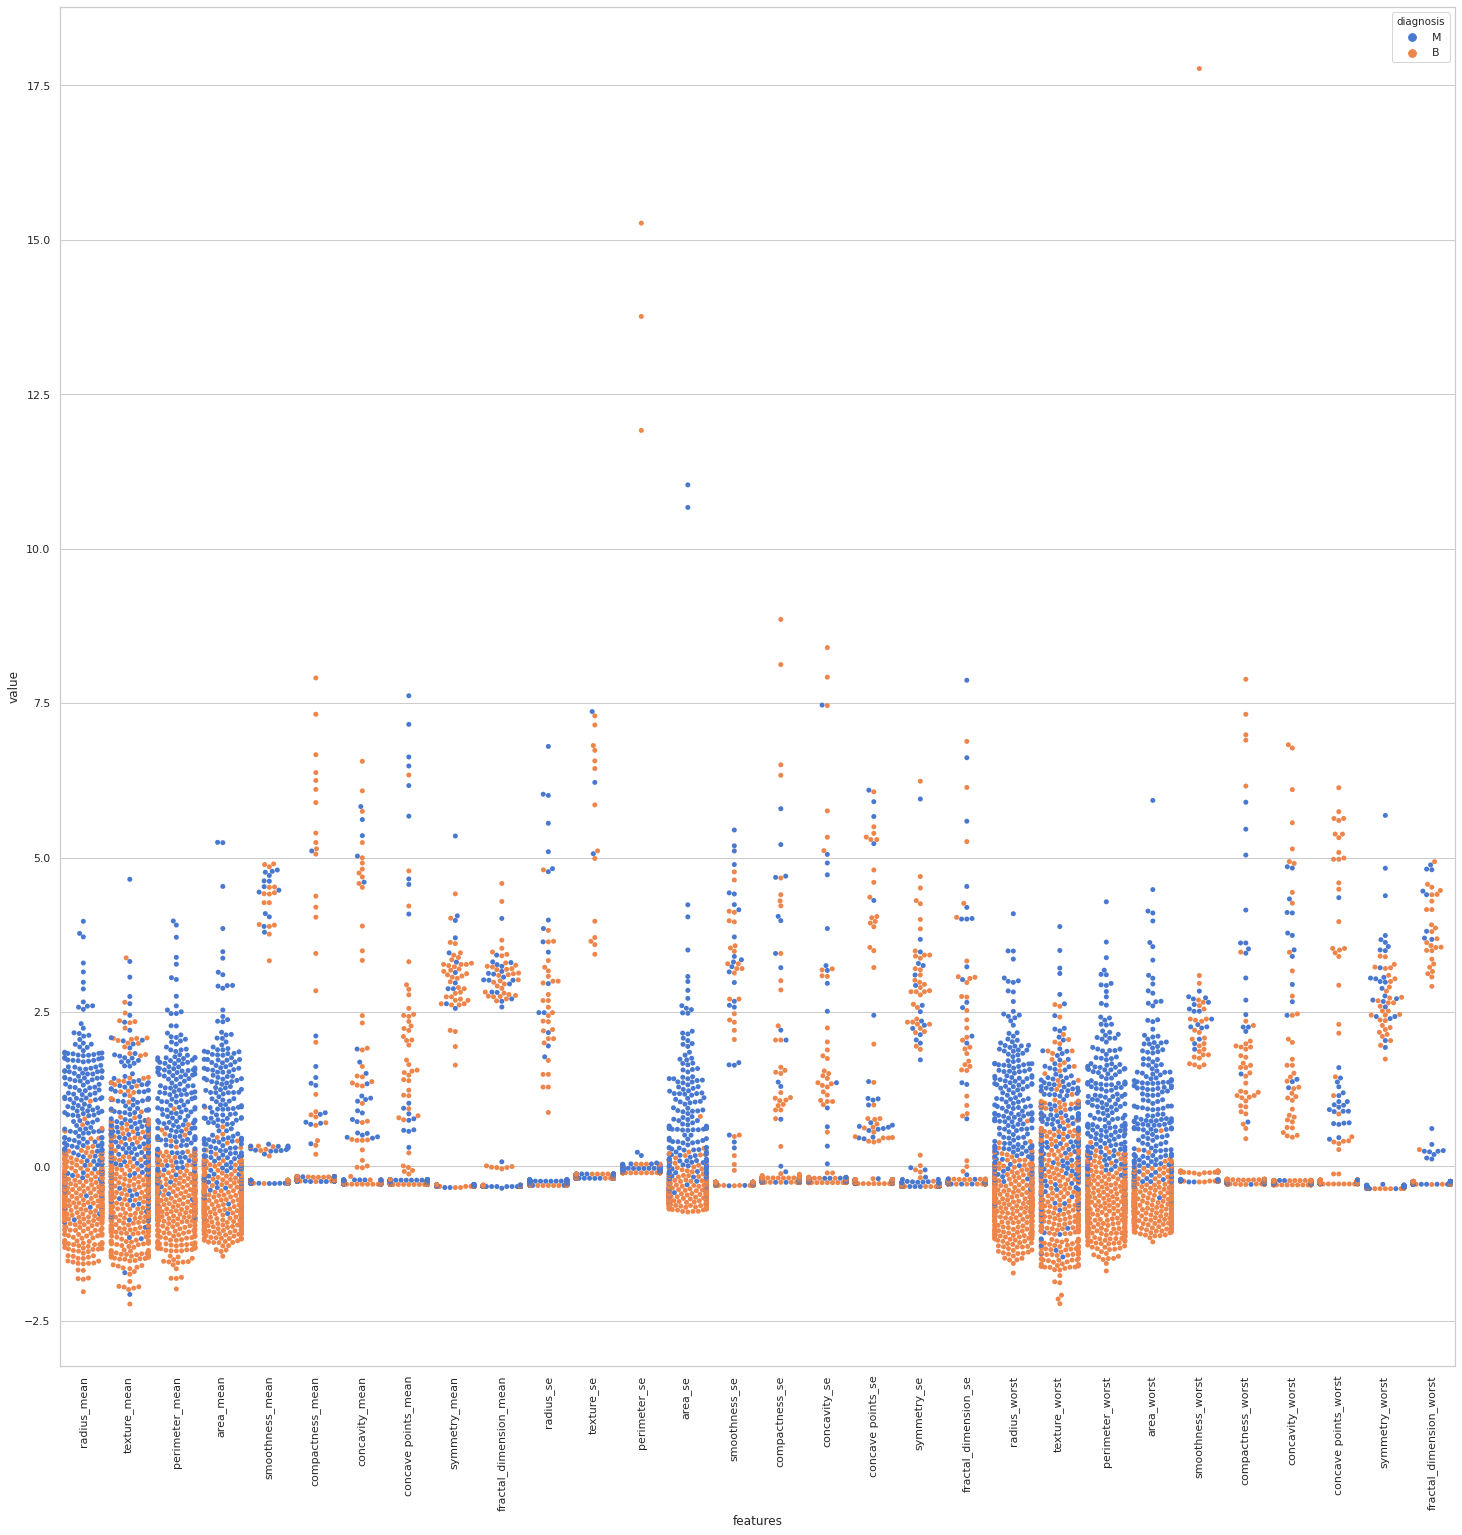

In [235]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([data_dia,data_n_2.iloc[:,0:568]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(25,25))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

# **Feature Engineering**

In [236]:
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=9, step=1)
rfe = rfe.fit(x, y)
print('Chosen best 9 feature by rfe:',x.columns[rfe.support_])

Chosen best 9 feature by rfe: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst'],
      dtype='object')


Text(0, 0.5, 'explained_variance_ratio_')

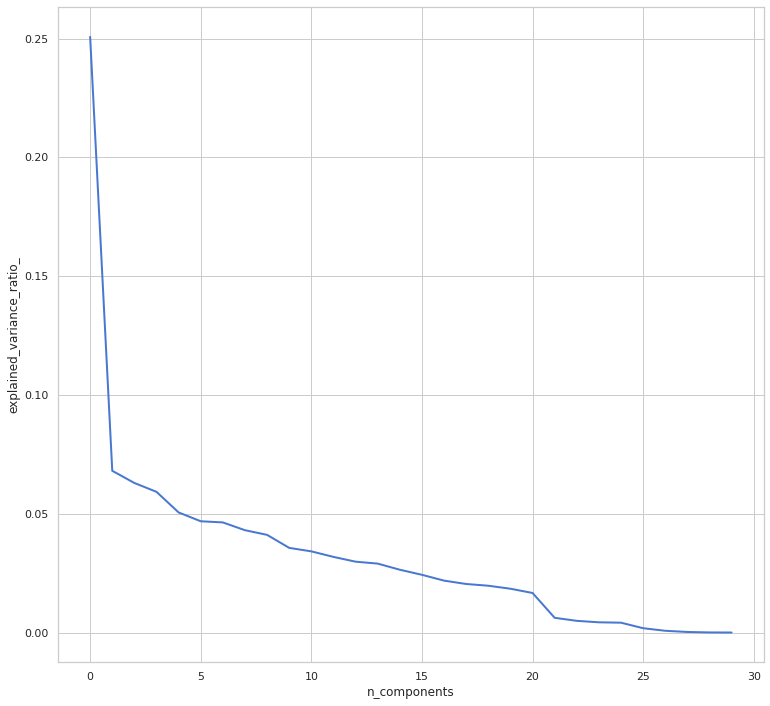

In [237]:
x_N = (x - x.mean())/(x.max()-x.min())
pca = PCA()
pca.fit(x_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [0]:
scaler = StandardScaler()
scaler.fit_transform(x, axis=1))

# **Decide which are key factors**

In [238]:
feature_index = []
for i in dataframe.columns:
  if i not in x.columns[rfe.support_] and i != 'diagnosis':
    feature_index.append(i)
feature_selection = dataframe.drop(feature_index, axis=1)
feature_selection

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,M,17.99,10.38,122.80,1001.0,153.40,25.380,17.33,184.60,2019.0
1,M,20.57,17.77,132.90,1326.0,74.08,24.990,23.41,158.80,1956.0
2,M,19.69,21.25,130.00,1203.0,94.03,23.570,25.53,152.50,1709.0
3,M,11.42,20.38,77.58,386.1,27.23,14.910,26.50,98.87,567.7
4,M,20.29,14.34,135.10,1297.0,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,158.70,25.450,26.40,166.10,2027.0
565,M,20.13,28.25,131.20,1261.0,99.04,23.690,38.25,155.00,1731.0
566,M,16.60,28.08,108.30,858.1,48.55,18.980,34.12,126.70,1124.0
567,M,20.60,29.33,140.10,1265.0,86.22,25.740,39.42,184.60,1821.0


In [239]:
#Change label to binary
feature_selection['diagnosis'] = feature_selection['diagnosis'].map({'M':1, 'B':0})
feature_selection

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,1,17.99,10.38,122.80,1001.0,153.40,25.380,17.33,184.60,2019.0
1,1,20.57,17.77,132.90,1326.0,74.08,24.990,23.41,158.80,1956.0
2,1,19.69,21.25,130.00,1203.0,94.03,23.570,25.53,152.50,1709.0
3,1,11.42,20.38,77.58,386.1,27.23,14.910,26.50,98.87,567.7
4,1,20.29,14.34,135.10,1297.0,94.44,22.540,16.67,152.20,1575.0
...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,158.70,25.450,26.40,166.10,2027.0
565,1,20.13,28.25,131.20,1261.0,99.04,23.690,38.25,155.00,1731.0
566,1,16.60,28.08,108.30,858.1,48.55,18.980,34.12,126.70,1124.0
567,1,20.60,29.33,140.10,1265.0,86.22,25.740,39.42,184.60,1821.0


In [240]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('diagnosis')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

dataset = df_to_dataset(feature_selection)
for feature_batch, label_batch in dataset.take(1):
  print('Every feature:', list(feature_batch.keys()))
  for feature in feature_batch:
    print('A batch of ' + feature + ' : ', feature_batch[feature] )
  print('A batch of diagnosis:', label_batch )

Every feature: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst']
A batch of radius_mean :  tf.Tensor(
[11.63  14.05  14.97  15.27  16.69  11.6   14.19   8.597  9.738 21.37
 13.17  13.73   9.668 10.16  13.66   8.726 11.76  16.16  13.28  13.37
 14.47  13.68  18.05  14.4   16.14  11.71  20.6   17.75  18.08  11.57
 11.49  11.08 ], shape=(32,), dtype=float64)
A batch of texture_mean :  tf.Tensor(
[29.29 27.15 19.76 12.91 20.2  12.84 23.81 18.6  11.97 15.1  18.22 22.61
 18.1  19.59 15.15 15.83 18.14 21.54 20.28 16.39 24.99 16.33 16.15 26.99
 14.86 16.67 29.33 28.03 21.84 19.04 14.59 14.71], shape=(32,), dtype=float64)
A batch of perimeter_mean :  tf.Tensor(
[ 74.87  91.38  95.5   98.17 107.1   74.34  92.87  54.09  61.24 141.3
  84.28  93.6   61.06  64.73  88.27  55.84  75.   106.2   87.32  86.1
  95.81  87.76 120.2   92.25 104.3   74.72 140.1  117.3  117.4   74.2
  73.99  70.21], shape=(32,), dtype=floa

# **Split data**

In [241]:
# Split the dataframe into train, validation, and tes
train, test = train_test_split(feature_selection, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train data')
print(len(val), 'validation data')
print(len(test), 'test data')

364 train data
91 validation data
114 test data
